## DeepKriging + PS on Durham data

Let's test our DeepKriging model (which adjusts for preferential sampling via MSE+BCE loss function) on the Durham data.

In [1]:
# Load in the 7pm Durham data (over course of month of July 2023) on a half-km grid. Note that the observations are averaged (thanks Zach!)

import numpy as np

data = np.load('july2023_eve.npy')
# open up the data and see what's inside:

# Check the data's structure and basic characteristics
print("Data Type:", type(data))
print("Shape of the data:", data.shape)
print(data.dtype)
print("The data is plotted on a 109 x 76 grid, with each grid cell being a half-km square.")


Data Type: <class 'numpy.ndarray'>
Shape of the data: (109, 76)
float32
The data is plotted on a 109 x 76 grid, with each grid cell being a half-km square.


In [2]:
# Investigate how much of the data is missing:

print("Number of non-NaN values:", np.sum(~np.isnan(data)))
print("Number of NaN values:", np.sum(np.isnan(data)))

Number of non-NaN values: 88
Number of NaN values: 8196


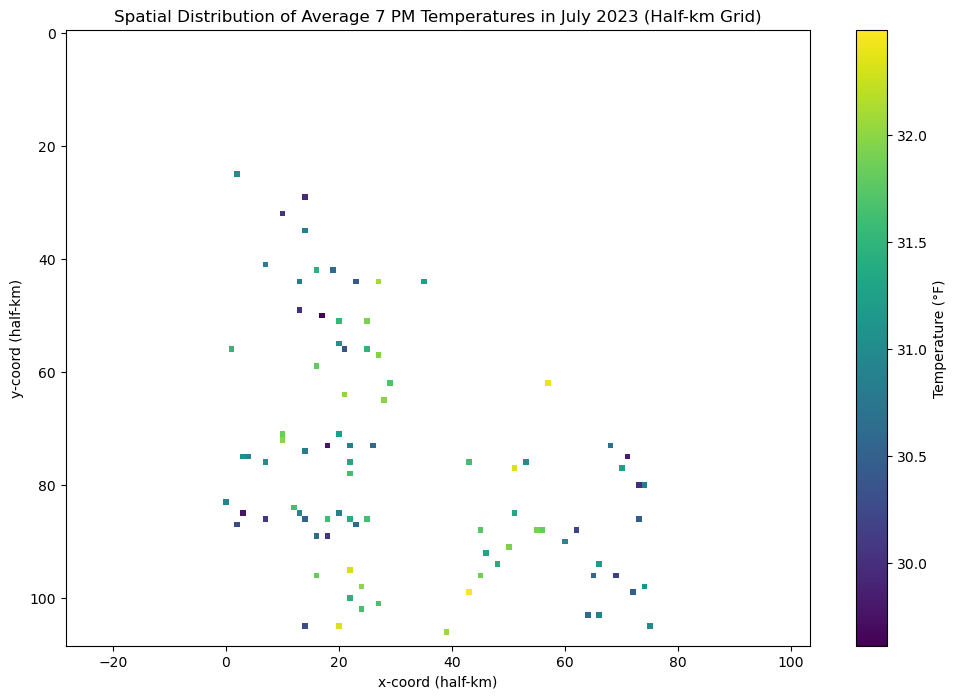

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.imshow(data, cmap='viridis', aspect='equal')  # Adjust aspect to 'equal' to scale axes equally
plt.colorbar(label="Temperature (°F)")
plt.title("Spatial Distribution of Average 7 PM Temperatures in July 2023 (Half-km Grid)")
plt.xlabel("x-coord (half-km)")
plt.ylabel("y-coord (half-km)")
plt.axis('equal')  # Make x and y scales equal
plt.show()



In [4]:
import numpy as np

# Load the data
data = np.load('july2023_eve.npy')

# Find non-NaN points and print them in the specified format
non_nan_points = []
for x in range(data.shape[0]):
    for y in range(data.shape[1]):
        if not np.isnan(data[x, y]):
            non_nan_points.append(((x, y), data[x, y]))

# Print the first few non-NaN points
# for point in non_nan_points:
    # print(point) # Point: (x, y), temperature

print(len(non_nan_points)) # This is how many observed points we have (88).

# Extract the coordinates of the observed points
observed_coords = [point[0] for point in non_nan_points]
for point in observed_coords:
    print(point)
print(len(observed_coords)) # This is how many observed points we have (88).

88
(25, 2)
(29, 14)
(32, 10)
(35, 14)
(41, 7)
(42, 16)
(42, 19)
(44, 13)
(44, 23)
(44, 27)
(44, 35)
(49, 13)
(50, 17)
(51, 20)
(51, 25)
(55, 20)
(56, 1)
(56, 21)
(56, 25)
(57, 27)
(59, 16)
(62, 29)
(62, 57)
(64, 21)
(65, 28)
(71, 10)
(71, 20)
(72, 10)
(73, 18)
(73, 22)
(73, 26)
(73, 68)
(74, 14)
(75, 3)
(75, 4)
(75, 71)
(76, 7)
(76, 22)
(76, 43)
(76, 53)
(77, 51)
(77, 70)
(78, 22)
(80, 73)
(80, 74)
(83, 0)
(84, 12)
(85, 3)
(85, 13)
(85, 20)
(85, 51)
(86, 7)
(86, 14)
(86, 18)
(86, 22)
(86, 25)
(86, 73)
(87, 2)
(87, 23)
(88, 45)
(88, 55)
(88, 56)
(88, 62)
(89, 16)
(89, 18)
(90, 60)
(91, 50)
(92, 46)
(94, 48)
(94, 66)
(95, 22)
(96, 16)
(96, 45)
(96, 65)
(96, 69)
(98, 24)
(98, 74)
(99, 43)
(99, 72)
(100, 22)
(101, 27)
(102, 24)
(103, 64)
(103, 66)
(105, 14)
(105, 20)
(105, 75)
(106, 39)
88


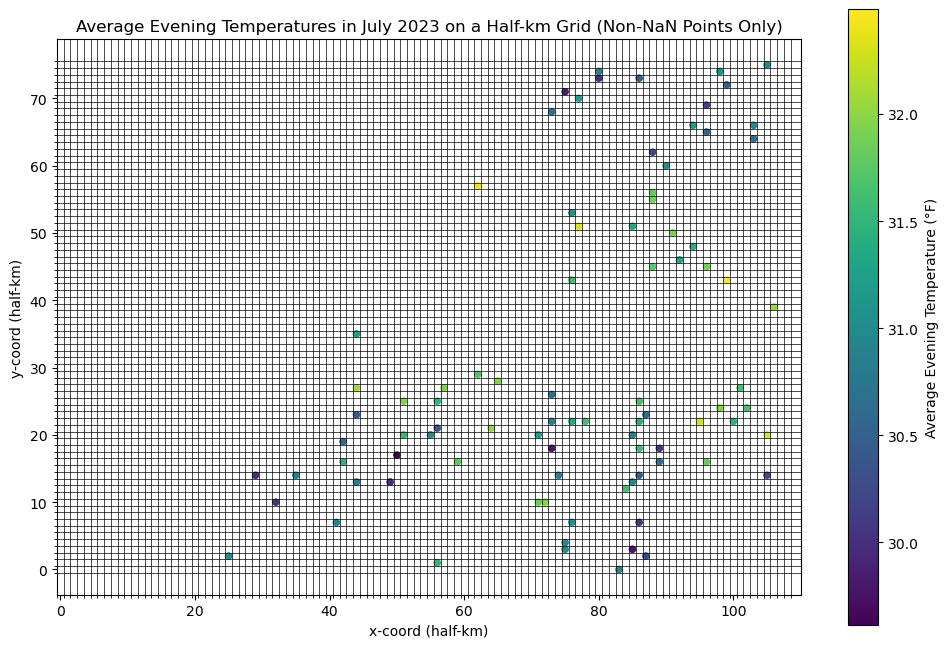

In [5]:
# Let's visualize the 109x76 grid overlaying the heatmap:

import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = np.load('july2023_eve.npy')

# Create a figure
plt.figure(figsize=(12, 8))

# Plot only the non-NaN data points
x_coords, y_coords, values = [], [], []
for x in range(data.shape[0]):
    for y in range(data.shape[1]):
        if not np.isnan(data[x, y]):
            x_coords.append(x)
            y_coords.append(y)
            values.append(data[x, y])

# Convert to numpy arrays
x_coords = np.array(x_coords)
y_coords = np.array(y_coords)
values = np.array(values)

# Plot the non-NaN points with a scatter plot
sc = plt.scatter(x_coords, y_coords, c=values, cmap='viridis', s=20)
plt.colorbar(sc, label="Average Evening Temperature (°F)")

# Set grid lines to match the 109 x 76 grid structure
plt.gca().set_xticks(np.arange(-0.5, data.shape[0], 1), minor=True)
plt.gca().set_yticks(np.arange(-0.5, data.shape[1], 1), minor=True)
plt.grid(which="minor", color="black", linestyle='-', linewidth=0.5)

# Set aspect to equal for consistent cell dimensions
plt.gca().set_aspect('equal')

# Label axes and title
plt.title("Average Evening Temperatures in July 2023 on a Half-km Grid (Non-NaN Points Only)")
plt.xlabel("x-coord (half-km)")
plt.ylabel("y-coord (half-km)")

# Display the plot
plt.show()







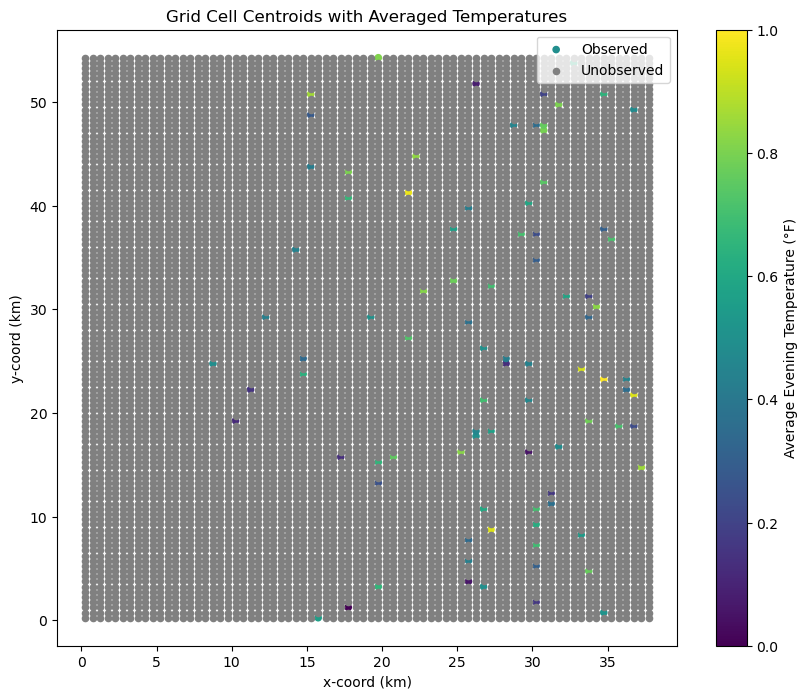

Observed Coordinates:
(8.75, 24.75)
(10.25, 19.25)
(11.25, 22.25)
(12.25, 29.25)
(14.25, 35.75)
(14.75, 23.75)
(14.75, 25.25)
(15.25, 43.75)
(15.25, 48.75)
(15.25, 50.75)
(15.75, 0.25)
(17.25, 15.75)
(17.75, 1.25)
(17.75, 40.75)
(17.75, 43.25)
(19.25, 29.25)
(19.75, 3.25)
(19.75, 13.25)
(19.75, 15.25)
(19.75, 54.25)
(20.75, 15.75)
(21.75, 27.25)
(21.75, 41.25)
(22.25, 44.75)
(22.75, 31.75)
(24.75, 32.75)
(24.75, 37.75)
(25.25, 16.25)
(25.75, 3.75)
(25.75, 5.75)
(25.75, 7.75)
(25.75, 28.75)
(25.75, 39.75)
(26.25, 17.75)
(26.25, 18.25)
(26.25, 51.75)
(26.75, 3.25)
(26.75, 10.75)
(26.75, 21.25)
(26.75, 26.25)
(27.25, 8.75)
(27.25, 18.25)
(27.25, 32.25)
(28.25, 24.75)
(28.25, 25.25)
(28.75, 47.75)
(29.25, 37.25)
(29.75, 16.25)
(29.75, 21.25)
(29.75, 24.75)
(29.75, 40.25)
(30.25, 1.75)
(30.25, 5.25)
(30.25, 7.25)
(30.25, 9.25)
(30.25, 10.75)
(30.25, 34.75)
(30.25, 37.25)
(30.25, 47.75)
(30.75, 42.25)
(30.75, 47.25)
(30.75, 47.75)
(30.75, 50.75)
(31.25, 11.25)
(31.25, 12.25)
(31.75, 16.75)
(

In [6]:
# Okay great, now that we've overlayed the half-km by half-km grid over the data we can
# plot the centroids and start plugging in the centroid data into the model.

# Let's start by plotting the centroids of the 109x76 grid:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from itertools import product

data = np.load('july2023_eve.npy')

# Define grid dimensions
cells_y, cells_x = data.shape  # cells_y = 109, cells_x = 76 ??
resolution = 0.5  # Each cell represents a 0.5 km x 0.5 km area

# Calculate centroids
x_coords = np.arange(cells_x) * resolution + (resolution / 2)
y_coords = np.arange(cells_y) * resolution + (resolution / 2)
centroids = np.array(list(product(x_coords, y_coords)))

# Flatten the data to associate with centroids
flattened_data = data.ravel()  # Convert data to 1D array to match centroids

# Create a DataFrame with centroid coordinates and corresponding temperature values
df = pd.DataFrame({
    'temp_avg': flattened_data,
    'x': centroids[:, 0],
    'y': centroids[:, 1]
})

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['x'], df['y']),
    crs="EPSG:4326"  # Use the appropriate CRS; adjust if necessary
)

# Compute grid_row and grid_col for each point
gdf['grid_row'] = np.floor(gdf['y'] / resolution).astype(int)  # Use 'y' for grid_row
gdf['grid_col'] = np.floor(gdf['x'] / resolution).astype(int)  # Use 'x' for grid_col

# Separate observed (non-NaN) and unobserved (NaN) points
observed = gdf[~gdf['temp_avg'].isna()]  # Cells with observations
unobserved = gdf[gdf['temp_avg'].isna()]  # Cells without observations

# Plot the centroids with temperature data
plt.figure(figsize=(10, 8))
plt.scatter(observed['x'], observed['y'], c=observed['temp_avg'], cmap='viridis', s=20, label='Observed')
plt.scatter(unobserved['x'], unobserved['y'], color='gray', s=20, label='Unobserved')
plt.colorbar(label="Average Evening Temperature (°F)")
plt.xlabel("x-coord (km)")
plt.ylabel("y-coord (km)")
plt.title("Grid Cell Centroids with Averaged Temperatures")
plt.legend()
plt.show()

# Extract all observed coordinates as a NumPy array of (x, y) pairs
observed_coords = observed[['x', 'y']].to_numpy()

# Optionally, convert to a list of tuples
observed_coords_list = [tuple(coord) for coord in observed_coords]

# Print the observed coordinates
print("Observed Coordinates:")
for coord in observed_coords_list:
    print(coord)

/usr/local/Caskroom/miniforge/base/envs/torch-env/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/Caskroom/miniforge/base/envs/torch-env/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/nd/v9lp325j6vx2vr517r25j0q00000gn/T/ipykernel_40416/2934061803.py:48: UserWarning: Setting the 'color' property will over

          x      y  grid_row  grid_col
1902   8.75  24.75        49        17
2218  10.25  19.25        38        20
2442  11.25  22.25        44        22
2674  12.25  29.25        58        24
3123  14.25  35.75        71        28
Observed Grid Cell Indices:
(49, 17)
(38, 20)
(44, 22)
(58, 24)
(71, 28)
(47, 29)
(50, 29)
(87, 30)
(97, 30)
(101, 30)
(0, 31)
(31, 34)
(2, 35)
(81, 35)
(86, 35)
(58, 38)
(6, 39)
(26, 39)
(30, 39)
(108, 39)
(31, 41)
(54, 43)
(82, 43)
(89, 44)
(63, 45)
(65, 49)
(75, 49)
(32, 50)
(7, 51)
(11, 51)
(15, 51)
(57, 51)
(79, 51)
(35, 52)
(36, 52)
(103, 52)
(6, 53)
(21, 53)
(42, 53)
(52, 53)
(17, 54)
(36, 54)
(64, 54)
(49, 56)
(50, 56)
(95, 57)
(74, 58)
(32, 59)
(42, 59)
(49, 59)
(80, 59)
(3, 60)
(10, 60)
(14, 60)
(18, 60)
(21, 60)
(69, 60)
(74, 60)
(95, 60)
(84, 61)
(94, 61)
(95, 61)
(101, 61)
(22, 62)
(24, 62)
(33, 63)
(99, 63)
(62, 64)
(107, 65)
(16, 66)
(48, 66)
(9, 67)
(38, 67)
(58, 67)
(62, 67)
(60, 68)
(1, 69)
(46, 69)
(75, 69)
(101, 69)
(73, 70)
(37, 71)
(4

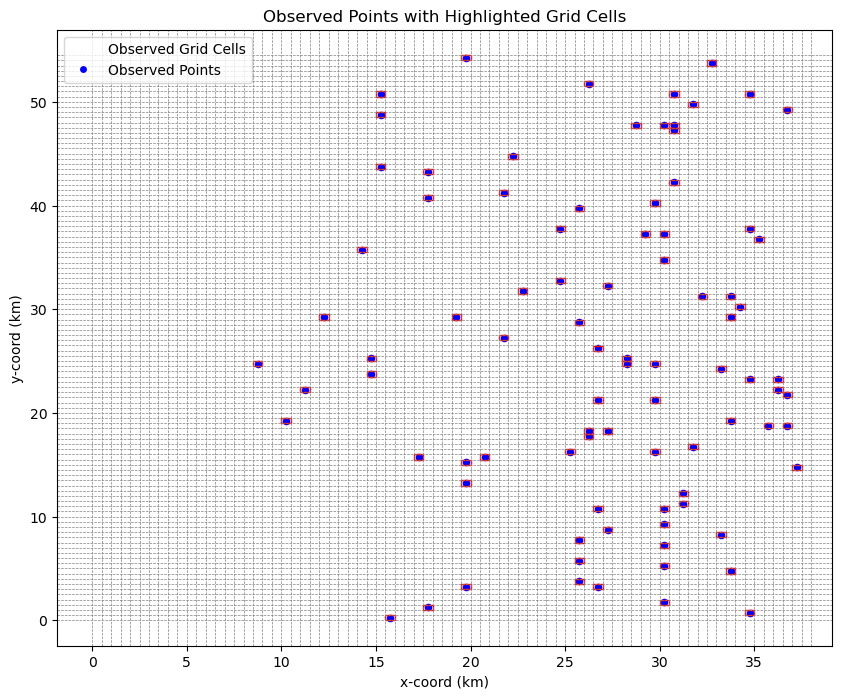

In [11]:
# Compute grid cell indices (row, col) for observed points
observed['grid_row'] = np.floor(observed['y'] / resolution).astype(int)
observed['grid_col'] = np.floor(observed['x'] / resolution).astype(int)

observed_sample = observed[['x', 'y', 'grid_row', 'grid_col']].head()
print(observed_sample)

# Extract grid indices as a list of tuples
observed_grid_cell_indices = list(zip(observed['grid_row'], observed['grid_col']))

# Print the grid cell indices
print("Observed Grid Cell Indices:")
for index in observed_grid_cell_indices:
    print(index)

import matplotlib.patches as patches

# Create a plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot observed points
plt.scatter(observed['x'], observed['y'], c='blue', label='Observed Points', s=20)

# Add grid lines
for i in range(cells_x + 1):
    plt.axvline(i * resolution, color='gray', linestyle='--', linewidth=0.5)
for j in range(cells_y + 1):
    plt.axhline(j * resolution, color='gray', linestyle='--', linewidth=0.5)

# Highlight observed grid cells
for _, row in observed.iterrows():
    # Calculate the grid cell boundaries
    x_left = row['grid_col'] * resolution  # Use 'grid_row' for x
    y_bottom = row['grid_row'] * resolution  # Use 'grid_col' for y

    # Add a rectangle to represent the observed grid cell
    rect = patches.Rectangle(
        (x_left, y_bottom), resolution, resolution, 
        linewidth=1, edgecolor='red', facecolor='none', label='Observed Grid Cell'
    )
    ax.add_patch(rect)

# Add labels and legend
plt.xlabel('x-coord (km)')
plt.ylabel('y-coord (km)')
plt.title('Observed Points with Highlighted Grid Cells')
plt.legend(handles=[
    patches.Patch(color='none', edgecolor='red', label='Observed Grid Cells'),
    plt.Line2D([0], [0], marker='o', color='w', label='Observed Points', markerfacecolor='blue', markersize=6)
])
plt.show()



Looks like our observed points lie within observed grid cells! Great! Which means that our ```observed_grid_indices``` contains the right indices!

In [ ]:
from itertools import product

# Generate all possible grid cell indices
all_grid_cell_indices = set(product(range(cells_y), range(cells_x)))

# Convert observed grid indices to a set
observed_grid_cell_indices = set(zip(observed['grid_row'], observed['grid_col']))

# Compute unobserved grid cell indices using set difference
unobserved_grid_cell_indices = all_grid_cell_indices - observed_grid_cell_indices

# Convert to a sorted list for easier visualization (optional)
unobserved_grid_cell_indices = sorted(list(unobserved_grid_cell_indices))

# Print the unobserved grid cell indices
print("Unobserved Grid Cell Indices:")
for index in unobserved_grid_cell_indices:
    print(index)

print(len(unobserved_grid_cell_indices)) # Should be 8196


Unobserved Grid Cell Indices:
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(0, 14)
(0, 15)
(0, 16)
(0, 17)
(0, 18)
(0, 19)
(0, 20)
(0, 21)
(0, 22)
(0, 23)
(0, 24)
(0, 25)
(0, 26)
(0, 27)
(0, 28)
(0, 29)
(0, 30)
(0, 32)
(0, 33)
(0, 34)
(0, 35)
(0, 36)
(0, 37)
(0, 38)
(0, 39)
(0, 40)
(0, 41)
(0, 42)
(0, 43)
(0, 44)
(0, 45)
(0, 46)
(0, 47)
(0, 48)
(0, 49)
(0, 50)
(0, 51)
(0, 52)
(0, 53)
(0, 54)
(0, 55)
(0, 56)
(0, 57)
(0, 58)
(0, 59)
(0, 60)
(0, 61)
(0, 62)
(0, 63)
(0, 64)
(0, 65)
(0, 66)
(0, 67)
(0, 68)
(0, 69)
(0, 70)
(0, 71)
(0, 72)
(0, 73)
(0, 74)
(0, 75)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(1, 11)
(1, 12)
(1, 13)
(1, 14)
(1, 15)
(1, 16)
(1, 17)
(1, 18)
(1, 19)
(1, 20)
(1, 21)
(1, 22)
(1, 23)
(1, 24)
(1, 25)
(1, 26)
(1, 27)
(1, 28)
(1, 29)
(1, 30)
(1, 31)
(1, 32)
(1, 33)
(1, 34)
(1, 35)
(1, 36)
(1, 37)
(1, 38)
(1, 39)
(1, 40)
(1, 41)
(1, 42)
(1, 43)
(1, 44)
(1, 45)
(1, 46)
(1, 47)
(1, 48

In [13]:
# Let's open up Zach's ICAR+PS predictions:
icar_ps_data = np.load('ps_mu.npy')

# Open up the data and see what's inside:
print("Data Type:", type(icar_ps_data))
print("Shape of the data:", icar_ps_data.shape)
print(icar_ps_data.dtype)
print("The data is plotted on a 109 x 76 grid, with each grid cell being a half-km square.")


Data Type: <class 'numpy.ndarray'>
Shape of the data: (109, 76)
float64
The data is plotted on a 109 x 76 grid, with each grid cell being a half-km square.


Here's the game plan. We have the y_trues for the observed data points, but we are obviously missing the y_trues for the unobserved data points. This is where we'll use Zach Calhoun's ICAR+PS model predictions as "ground truth" values, so we can train our model in a way that minimizes loss. The goal of this is to see if we can recreate the same results as Zach's model.

In [15]:
print(gdf.columns)

# Select a few observed points
observed_sample = observed[['x', 'y']].head()

# Print corresponding grid_row and grid_col
for _, row in observed_sample.iterrows():
    print(f"x: {row['x']}, y: {row['y']}")
    print(f"grid_col: {np.floor(row['x'] / resolution)}", f"grid_row: {np.floor(row['y'] / resolution)}")


Index(['temp_avg', 'x', 'y', 'geometry', 'grid_row', 'grid_col'], dtype='object')
x: 8.75, y: 24.75
grid_col: 17.0 grid_row: 49.0
x: 10.25, y: 19.25
grid_col: 20.0 grid_row: 38.0
x: 11.25, y: 22.25
grid_col: 22.0 grid_row: 44.0
x: 12.25, y: 29.25
grid_col: 24.0 grid_row: 58.0
x: 14.25, y: 35.75
grid_col: 28.0 grid_row: 71.0


In [ ]:
print(len(unobserved_grid_cell_indices))

print(len(observed_grid_cell_indices))

8217
88


In [ ]:
unobserved_grid_cell_indices


[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 77),
 (0, 78),
 (0, 79),
 (0, 80),
 (0, 81),
 (0, 82),
 (0, 83),
 (0, 84),
 (0, 85),
 (0, 86),
 (0, 87),
 (0, 88),
 (0, 89),
 (0, 90),
 (0, 91),
 (0, 92),
 (0, 93),
 (0, 94),
 (0, 95),
 (0, 96),
 (0, 97),
 (0, 98),
 (0, 99),
 (0, 100),

In [16]:
corner_temp_avg = gdf.query("grid_row == 0 and grid_col == 0")['temp_avg'].values

# Print the result
if len(corner_temp_avg) > 0:
    print(f"The temp_avg value for grid_row=0 and grid_col=0 is: {corner_temp_avg[0]}")
else:
    print("No matching row found for grid_row=0 and grid_col=0.")

The temp_avg value for grid_row=0 and grid_col=0 is: nan


In [17]:
# NB: Zach's ICAR+PS file contains a prediction for each grid cell in the 109x76 grid.

# Let's now set the unobserved grid cells in the gdf to the same values as the ICAR+PS predictions.
# We can do this by indexing into the gdf at the unobserved_grid_cell_indices and setting the 'temp_avg' column to the corresponding values in icar_ps_data.

# Create a copy of the original GeoDataFrame
gdf_new = gdf.copy()

# Iterate over unobserved grid cell indices and update `gdf_new`
num_matches = 0
for row, col in unobserved_grid_cell_indices:
    # Check if any row matches
    matches = gdf_new.loc[(gdf_new['grid_row'] == row) & (gdf_new['grid_col'] == col)]
    if matches.empty:
        print(f"No match for grid_row={row}, grid_col={col}")
    else:
        print(f"Match found for grid_row={row}, grid_col={col}")
        num_matches += 1
        
    # Get the prediction value from icar_ps_data for this grid cell
    predicted_value = icar_ps_data[row, col]
    
    # Update only unobserved cells
    gdf_new.loc[
        (gdf_new['grid_row'] == row) & 
        (gdf_new['grid_col'] == col) & 
        (gdf_new['temp_avg'].isna()), 
        'temp_avg'
    ] = predicted_value

# Let's check if that actually did what we want it to do:

# Count non-NaN rows in temp_avg
non_nan_count = gdf_new['temp_avg'].notna().sum()

# Total grid cells = observed + unobserved
expected_count = len(gdf)  # This should match the total number of rows in gdf_new

print(f"Non-NaN count in temp_avg: {non_nan_count}")
print(f"Total grid cells in gdf: {expected_count}")

if non_nan_count == expected_count:
    print("All grid cells have been successfully updated.")
else:
    print("Some grid cells still have NaN values.")



Match found for grid_row=0, grid_col=0
Match found for grid_row=0, grid_col=1
Match found for grid_row=0, grid_col=2
Match found for grid_row=0, grid_col=3
Match found for grid_row=0, grid_col=4
Match found for grid_row=0, grid_col=5
Match found for grid_row=0, grid_col=6
Match found for grid_row=0, grid_col=7
Match found for grid_row=0, grid_col=8
Match found for grid_row=0, grid_col=9
Match found for grid_row=0, grid_col=10
Match found for grid_row=0, grid_col=11
Match found for grid_row=0, grid_col=12
Match found for grid_row=0, grid_col=13
Match found for grid_row=0, grid_col=14
Match found for grid_row=0, grid_col=15
Match found for grid_row=0, grid_col=16
Match found for grid_row=0, grid_col=17
Match found for grid_row=0, grid_col=18
Match found for grid_row=0, grid_col=19
Match found for grid_row=0, grid_col=20
Match found for grid_row=0, grid_col=21
Match found for grid_row=0, grid_col=22
Match found for grid_row=0, grid_col=23
Match found for grid_row=0, grid_col=24
Match foun

/var/folders/nd/v9lp325j6vx2vr517r25j0q00000gn/T/ipykernel_40416/3684478869.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '30.923366923049954' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  gdf_new.loc[


Match found for grid_row=1, grid_col=4
Match found for grid_row=1, grid_col=5
Match found for grid_row=1, grid_col=6
Match found for grid_row=1, grid_col=7
Match found for grid_row=1, grid_col=8
Match found for grid_row=1, grid_col=9
Match found for grid_row=1, grid_col=10
Match found for grid_row=1, grid_col=11
Match found for grid_row=1, grid_col=12
Match found for grid_row=1, grid_col=13
Match found for grid_row=1, grid_col=14
Match found for grid_row=1, grid_col=15
Match found for grid_row=1, grid_col=16
Match found for grid_row=1, grid_col=17
Match found for grid_row=1, grid_col=18
Match found for grid_row=1, grid_col=19
Match found for grid_row=1, grid_col=20
Match found for grid_row=1, grid_col=21
Match found for grid_row=1, grid_col=22
Match found for grid_row=1, grid_col=23
Match found for grid_row=1, grid_col=24
Match found for grid_row=1, grid_col=25
Match found for grid_row=1, grid_col=26
Match found for grid_row=1, grid_col=27
Match found for grid_row=1, grid_col=28
Match 

In [18]:
temp_avg_value = gdf_new.query("grid_row == 0 and grid_col == 0")['temp_avg'].values

# Print the result
if len(temp_avg_value) > 0:
    print(f"The temp_avg value for grid_row=0 and grid_col=0 is: {temp_avg_value[0]}")
else:
    print("No matching row found for grid_row=0 and grid_col=0.")

The temp_avg value for grid_row=0 and grid_col=0 is: 30.923366923049954


In [27]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

import sys
import os

# Assuming the parent directory is one level up from the current script
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, parent_dir)

# Now you can import from custom_dk_imports
from custom_dk_imports import DeepKrigingMLP, Trainer

# Define necessary parts from nn.py
class DeepKrigingEmbedding3d(nn.Module):
    def __init__(self, K: int):
        super(DeepKrigingEmbedding3d, self).__init__()
        self.K = K
        self.num_basis = [(9*2**(h-1)+1)**2 for h in range(1,self.K+1)]
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def forward(self, s: torch.Tensor) -> torch.Tensor:
        knots_1d = [torch.linspace(0, 1, int(np.sqrt(i))).to(self.device) for i in self.num_basis]
        N = s.shape[0]
        phi = torch.zeros(N, sum(self.num_basis)).to(self.device)
        K = 0
        for res, num_basis_res in enumerate(self.num_basis):
            theta = 1 / np.sqrt(num_basis_res) * 2.5
            knots_s1, knots_s2 = torch.meshgrid(knots_1d[res], knots_1d[res], indexing='ij')
            knots = torch.stack((knots_s1.flatten(), knots_s2.flatten()), dim=1).to(self.device)
            d = torch.cdist(s, knots) / theta
            mask = (d >= 0) & (d <= 1)
            weights = torch.zeros_like(d)
            weights[mask] = ((1 - d[mask]) ** 6 * (35 * d[mask] ** 2 + 18 * d[mask] + 3) / 3)
            phi[:, K:K + num_basis_res] = weights
            K += num_basis_res
        return phi

In [36]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split

import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

import sys
import os
# Get the absolute path of the parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
# Add the parent directory to the Python path
sys.path.insert(0, parent_dir)
# Now you can import your module
from custom_dk_imports import DeepKrigingMLP, Trainer, NewLoss

grid_shape = (109, 76)  # Grid shape (rows, cols)


# RECALL: gdf_new is (grid_row, grid_col, temp_avg)

# Extract all coordinates and temp_avg values from gdf_new
grid_points = gdf_new[['x', 'y']].to_numpy()  # All grid points as (x, y) coordinates
temp_values = gdf_new['temp_avg'].to_numpy()  # Corresponding temperature values

# Convert observed/unobserved grid indices to arrays
observed_grid_cell_indices_array = np.array(list(observed_grid_cell_indices))  # Observed grid indices
unobserved_grid_cell_indices_array = np.array(list(unobserved_grid_cell_indices))  # Unobserved grid indices

# Map (row, col) to flattened indices
observed_flat_indices = np.ravel_multi_index(
    (observed_grid_cell_indices_array[:, 0], observed_grid_cell_indices_array[:, 1]),
    dims=(109, 76)
)
unobserved_flat_indices = np.ravel_multi_index(
    (unobserved_grid_cell_indices_array[:, 0], unobserved_grid_cell_indices_array[:, 1]),
    dims=(109, 76)
)

# Extract observed and unobserved points and values
observed_points = grid_points[observed_flat_indices]
observed_values = temp_values[observed_flat_indices]

unobserved_points = grid_points[unobserved_flat_indices]
unobserved_values = temp_values[unobserved_flat_indices]

# Verify the counts
print(f"Number of observed points: {len(observed_points)}")
print(f"Number of unobserved points: {len(unobserved_points)}")
print(f"Total grid cells: {len(grid_points)}")
assert len(observed_points) + len(unobserved_points) == len(grid_points), "Mismatch in total grid cells!"

# Define M as an indicator array for the entire grid
M = np.zeros(len(grid_points))
M[observed_flat_indices] = 1  # Mark observed points


Number of observed points: 88
Number of unobserved points: 8196
Total grid cells: 8284


In [39]:
s_train, s_val, y_train, y_val, M_train, M_val = train_test_split(grid_points, temp_values, M, test_size=0.2, random_state=2023)
s_test = grid_points  # Use the full grid as the test set

# Convert M_train and M_val back to torch tensors
M_train = torch.tensor(M_train, dtype=torch.float32)
M_val = torch.tensor(M_val, dtype=torch.float32)

# Define model parameters
num_hidden_layers = 1
hidden_dims = 100
K = 3  # embedding layer will update K based on DeepKrigingEmbedding3d

# Instantiate the embedding layer
embedding_layer = DeepKrigingEmbedding3d(K)
input_dim = sum(embedding_layer.num_basis)  # This should match 1830

# Normalize spatial coordinates
s_mean, s_std = grid_points.mean(axis=0), grid_points.std(axis=0)
s_train = (s_train - s_mean) / s_std
s_val = (s_val - s_mean) / s_std
s_test = (s_test - s_mean) / s_std

# Normalize temperature values
y_mean, y_std = temp_values.mean(), temp_values.std()
y_train = (y_train - y_mean) / y_std
y_val = (y_val - y_mean) / y_std
y_test = (temp_values - y_mean) / y_std

# Convert numpy arrays to torch tensors
s_train_tensor = torch.tensor(s_train, dtype=torch.float32)
s_val_tensor = torch.tensor(s_val, dtype=torch.float32)
s_test_tensor = torch.tensor(s_test, dtype=torch.float32)
s_all_tensor = torch.tensor(grid_points, dtype=torch.float32)
# print(s_train_tensor)

embedding_layer.eval()
# Compute the basis functions for each split using the tensor inputs
phi_train = embedding_layer(s_train_tensor)
phi_val = embedding_layer(s_val_tensor)
phi_test = embedding_layer(s_test_tensor)
phi_all = embedding_layer(s_all_tensor)

# Convert y_train, y_val, and y_test to torch tensors
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(temp_values, dtype=torch.float32).view(-1, 1)
y_all_tensor = torch.tensor(temp_values, dtype=torch.float32).view(-1, 1)


deepkriging_model = DeepKrigingMLP(input_dim, num_hidden_layers, hidden_dims, K=K, activation='relu')

train_loader = torch.utils.data.DataLoader(
    dataset=torch.utils.data.TensorDataset(phi_train, y_train),
    batch_size=32, shuffle=True
)

val_loader = torch.utils.data.DataLoader(
    dataset=torch.utils.data.TensorDataset(phi_val, y_val),
    batch_size=32, shuffle=False
)

test_loader = torch.utils.data.DataLoader(
    dataset=torch.utils.data.TensorDataset(phi_test, y_test),
    batch_size=32, shuffle=False
)

data_generators = {'train': train_loader, 'val': val_loader, 'test': test_loader}

from custom_dk_imports import NewLoss
trainer = Trainer(
    model=deepkriging_model,
    data_generators={'train': train_loader, 'val': val_loader, 'test': test_loader},
    optim='adam',
    optim_params={'lr': 0.001},
    loss_fn=NewLoss(s_all=grid_points, observed_indices=observed_flat_indices, y_all=temp_values),
    # loss_fn=nn.MSELoss(),
    M_train=M_train,
    M_val=M_val,
    window_size=10,
    device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    epochs=100,
    patience=10
)

trainer.train()

deepkriging_model.eval()

with torch.no_grad():
    y_pred_deepkriging = deepkriging_model(phi_all).cpu().numpy()

Training started:

Epoch 1/100
Learning rate: 0.001000
0s for 208 steps - 2ms/step - loss 1.5175
Validation:
0s - loss 1.4936

Epoch 2/100
Learning rate: 0.001000
0s for 208 steps - 2ms/step - loss 1.4563
Validation:
0s - loss 1.4849

Epoch 3/100
Learning rate: 0.001000
0s for 208 steps - 1ms/step - loss 1.4488
Validation:
0s - loss 1.4793

Epoch 4/100
Learning rate: 0.001000
0s for 208 steps - 2ms/step - loss 1.4458
Validation:
0s - loss 1.4767

Epoch 5/100
Learning rate: 0.001000
0s for 208 steps - 2ms/step - loss 1.4430
Validation:
0s - loss 1.4766

Epoch 6/100
Learning rate: 0.001000
0s for 208 steps - 2ms/step - loss 1.4406
Validation:
0s - loss 1.4736

Epoch 7/100
Learning rate: 0.001000
1s for 208 steps - 2ms/step - loss 1.4389
Validation:
0s - loss 1.4777

Epoch 8/100
Learning rate: 0.001000
0s for 208 steps - 2ms/step - loss 1.4373
Validation:
0s - loss 1.4711

Epoch 9/100
Learning rate: 0.001000
0s for 208 steps - 2ms/step - loss 1.4355
Validation:
0s - loss 1.4686

Epoch 10/

Text(0, 0.5, 'y-coord (km)')

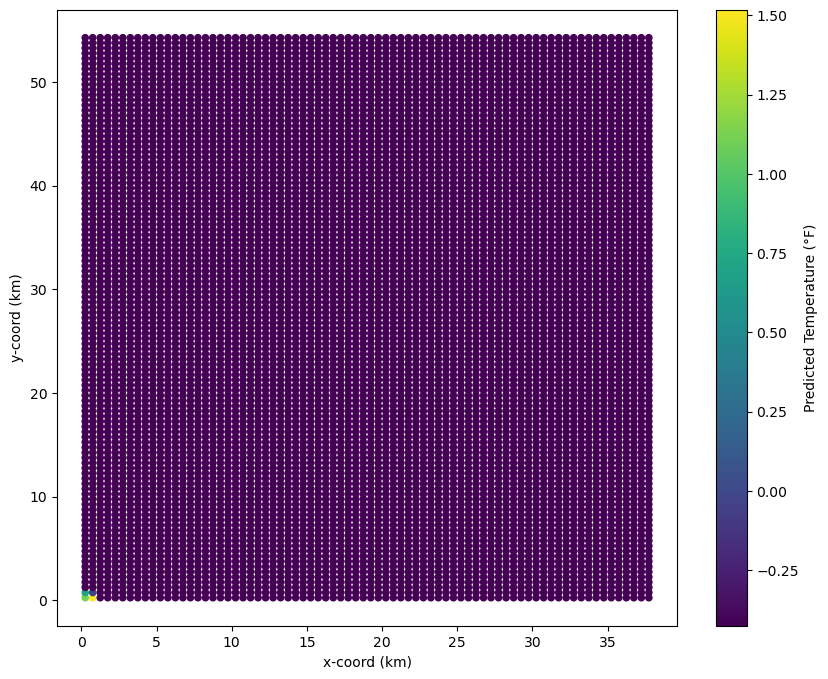

In [40]:
# Ask Zach how to display results in Map Format.

# Send the predictions back to the main script for visualization

# Visualize the predictions
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Assuming 'gdf' is the GeoDataFrame with grid centroids
gdf['temp_pred'] = y_pred_deepkriging

# Create a GeoDataFrame for the predictions
gdf_pred = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf['x'], gdf['y']), crs="EPSG:4326")

# Plot the predictions
plt.figure(figsize=(10, 8))
plt.scatter(gdf_pred['x'], gdf_pred['y'], c=gdf_pred['temp_pred'], cmap='viridis', s=20)
plt.colorbar(label="Predicted Temperature (°F)")
plt.xlabel("x-coord (km)")
plt.ylabel("y-coord (km)")